In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [2]:
def roos(y_pre,y_true):
    up=np.sum((y_true-y_pre)**2)
    down=np.sum(y_true**2)
    return 1-up/down

In [3]:
# df=pd.read_excel('total.xlsx')
# #all of the data
# df=pd.read_excel('bottom1000.xlsx')
# #data of bottom 1000
df=pd.read_excel('top1000.xlsx')
#data of top 1000

In [4]:
from sklearn.model_selection import train_test_split 
df_train,df_test=train_test_split (df,test_size=0.3,random_state=123)

In [5]:
df_train

,return,regcap,tasset,floatss,avgpr,avgturn,volume,pe,pb,ps,...,code15,code20,code25,code30,code35,code40,code45,code50,code55,code60
9940,-0.298127,13.345333,3.260400,16948.6620,20.990310,3.566324,2304.819093,46.705624,6.566104,1.455392,...,1,0,0,0,0,0,0,0,0,0
1384,-0.041954,17.841681,17.841681,84963.1332,17.743622,1.340175,5225.092410,23.228167,1.375544,0.680402,...,0,0,0,1,0,0,0,0,0,0
3394,-0.211702,5.894767,5.894767,16627.0802,41.187846,1.044582,1496.288353,44.305984,2.911517,1.757479,...,0,1,0,0,0,0,0,0,0,0
1475,0.669617,27.902082,27.902082,42099.4628,6.441834,4.480379,23524.300233,24.342978,1.633476,1.487879,...,0,0,0,0,0,0,0,0,1,0
4578,-1.090299,19.928697,19.928697,48417.6000,11.048323,1.519968,2790.023345,41.000015,2.370262,20.597973,...,0,0,0,0,1,0,0,0,0,0
1971,0.143412,53.697960,53.697960,10600.3916,4.714198,1.304164,5168.230253,56.222870,3.845429,7.134981,...,0,1,0,0,0,0,0,0,0,0
3520,-0.555946,68.004958,68.004958,34275.7575,2.552066,1.944038,9455.033325,28.066483,1.138273,4.477474,...,0,0,0,0,0,0,0,0,0,0
6669,0.418797,11.824891,11.824891,61152.0616,21.981550,1.983736,5747.078289,83.848251,6.510504,5.416873,...,0,1,0,0,0,0,0,0,0,0
2706,0.635292,18.025091,17.790190,53035.2000,5.994762,0.998695,4310.743563,20.405016,2.151622,2.514875,...,0,1,0,0,0,0,0,0,0,0
4204,-0.144653,19.000064,6.178052,12801.3228,46.869709,2.426317,3627.559318,365.769104,11.681012,12.473698,...,0,0,0,0,0,0,1,0,0,0


In [6]:
df_test

,return,regcap,tasset,floatss,avgpr,avgturn,volume,pe,pb,ps,...,code15,code20,code25,code30,code35,code40,code45,code50,code55,code60
8803,-0.399180,16.052432,1.822320,5.889028e+02,40.093734,1.468459,208.602307,30.283976,2.481945,13.434534,...,0,0,0,0,1,0,0,0,0,0
7006,1.138822,9.410818,2.641440,3.112312e+03,31.611147,2.372642,1424.719746,84.558449,13.757714,4.471876,...,0,0,0,0,0,0,1,0,0,0
1131,0.642677,4.051330,4.030900,8.537024e+02,92.441855,2.446496,618.897193,117.109154,13.407325,18.013365,...,0,1,0,0,0,0,0,0,0,0
7773,-0.866934,23.759820,14.678560,8.045017e+03,9.020271,1.494887,1516.903603,43.538322,3.181465,0.413356,...,1,0,0,0,0,0,0,0,0,0
1193,0.212430,11.434385,11.434385,4.637399e+04,33.430879,0.849779,2209.027787,24.457226,3.441643,3.856900,...,0,1,0,0,0,0,0,0,0,0
7748,-0.405072,19.215735,13.266862,9.207073e+04,10.435211,0.316996,912.601549,9.470522,2.042524,1.817909,...,1,0,0,0,0,0,0,0,0,0
1593,0.089325,12.530119,12.530119,3.746506e+04,15.060360,1.145228,3127.610807,15.372703,1.154632,1.644354,...,1,0,0,0,0,0,0,0,0,0
1308,-0.058237,23.667183,23.667183,1.056347e+05,11.689177,0.972494,4890.134709,-57.012257,1.529776,5.325090,...,0,1,0,0,0,0,0,0,0,0
9260,-0.755199,263.293122,218.119637,6.316353e+05,6.256464,0.890089,22117.441166,17.837078,4.057062,3.039296,...,1,0,0,0,0,0,0,0,0,0
10440,0.368780,13.676735,11.729431,3.527422e+04,8.294101,2.167827,4576.226927,27.814827,4.629802,19.451361,...,0,0,0,0,0,0,1,0,0,0


In [7]:
X_train=df_train[df_train.columns[1:]]   #训练集输入
y_train=np.array(df_train['return']).flatten()  #训练集输出
X_test=df_test[df_test.columns[1:]]  #测试集输入  
y_test=np.array(df_test['return']).flatten()  #测试集输出

In [8]:
#标准化
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train) 
X_test=scale.transform(X_test)

In [9]:
import sklearn
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

D:\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [35]:
#Random Forest
#调参
estimator=RandomForestRegressor(random_state=1)
param_grid={'n_estimators':range(5,30,5),'max_depth':range(5,30,5)}
grid=sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 15, 'n_estimators': 25}

In [10]:
rf = RandomForestRegressor(max_depth= 15, n_estimators=25,random_state=0)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
mse=mean_squared_error(y_pred_rf,y_test)
mae=mean_absolute_error(y_pred_rf,y_test)
rmse=mse**0.5
roos2=roos(y_pred_rf,y_test)
print('mse:{},rmse:{},mae:{},roos2:{}'.format(mse,rmse,mae,roos2))
rf_res=[mse,rmse,mae,roos2]    
print(r2_score(y_test,y_pred_rf))

mse:0.12844784127753822,rmse:0.35839620711935305,mae:0.27518330316799766,roos2:0.42043465393133184
0.4204336905061449


NAVPS         0.175795
pb            0.115585
avgturn       0.104550
pcheps        0.089412
pe            0.041931
volume        0.035741
avgpr         0.029585
pchncf        0.025252
tasset        0.025051
floatss       0.024396
oreceviabe    0.023804
itd           0.022685
pchlia        0.021770
pchshare      0.020683
ni            0.019617
ncf           0.019562
cata          0.019459
regcap        0.018168
ps            0.017990
roe           0.017939
quick         0.015789
roic          0.015740
tatl          0.013512
cash          0.013414
rota          0.012502
alia          0.012493
current       0.011848
clteq         0.011532
roa           0.011454
code45        0.003013
code20        0.002183
code15        0.001848
code25        0.001646
code35        0.001340
code30        0.000855
code55        0.000827
code10        0.000586
code60        0.000255
code50        0.000151
code40        0.000036
dtype: float64


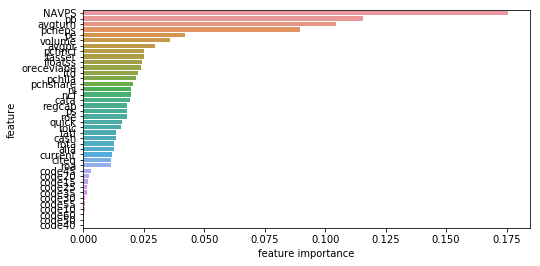

In [18]:
#feature importance
importances = pd.Series(data=rf.feature_importances_,index=df_train.columns[1:]).sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(y=importances.index,x=importances.values,orient='h')
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.savefig('随机森林重要性系数.jpg',dpi=600,bbox_inches='tight')
plt.rcParams["font.size"] = 15
print(importances)

In [13]:
#GBRT调参
estimator=GradientBoostingRegressor(random_state=1)
param_grid={'n_estimators':range(100,400,100),'learning_rate':[1e-3,1e-1]}
grid=sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [14]:
gbrt=GradientBoostingRegressor(n_estimators=300,learning_rate=0.1,random_state=1)
gbrt.fit(X_train,y_train)
y_pred_gbrt=gbrt.predict(X_test)
mse=mean_squared_error(y_pred_gbrt,y_test)
mae=mean_absolute_error(y_pred_gbrt,y_test)
rmse=mse**0.5
roos2=roos(y_pred_gbrt,y_test)
print('mse:{},rmse:{},mae:{},roos2:{}'.format(mse,rmse,mae,roos2))
gbrt_res=[mse,rmse,mae,roos2]
print(r2_score(y_test,y_pred_gbrt))

mse:0.11951271726708627,rmse:0.34570611401461543,mae:0.26483865358317443,roos2:0.4607505377000193
0.46074964129287976


tasset        0.086499
NAVPS         0.081329
pe            0.061089
pb            0.059604
pcheps        0.059065
avgpr         0.057832
avgturn       0.056454
ni            0.041107
volume        0.039772
itd           0.038263
oreceviabe    0.037475
floatss       0.035033
roic          0.033276
ps            0.030203
pchshare      0.029141
pchncf        0.028168
pchlia        0.025692
roe           0.023595
regcap        0.020474
roa           0.018773
ncf           0.016920
cata          0.014447
alia          0.014341
quick         0.012812
tatl          0.011951
cash          0.011090
current       0.011043
rota          0.010194
clteq         0.009711
code45        0.007248
code20        0.004916
code15        0.003495
code25        0.003182
code55        0.002339
code10        0.002237
code35        0.000621
code30        0.000448
code40        0.000161
code50        0.000000
code60        0.000000
dtype: float64


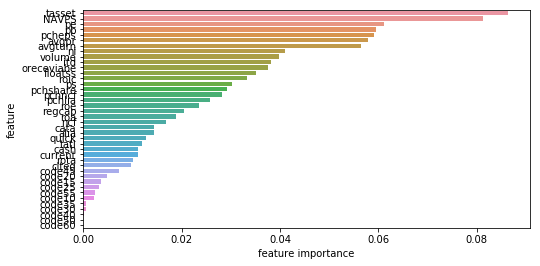

In [15]:
#feature importance
importances = pd.Series(data=gbrt.feature_importances_,index=df_train.columns[1:]).sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(y=importances.index,x=importances.values,orient='h')
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.savefig('GBRT重要性系数.jpg',dpi=600,bbox_inches='tight')
print(importances)

In [18]:
#神经网络调参
#NN1
from sklearn.neural_network import MLPRegressor
estimator=MLPRegressor(hidden_layer_sizes=(16,), activation='relu',solver='adam',alpha=0.1,max_iter=2000,random_state=12)
param_grid={'learning_rate_init':[1e-3,1e-2]}
grid=sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'learning_rate_init': 0.001}

In [17]:
mlp=MLPRegressor(hidden_layer_sizes=(16,), activation='relu',solver='adam',alpha=0.001,max_iter=5000,learning_rate_init=0.01,random_state=12)
mlp.fit(X_train,y_train)
y_pred_mlp=mlp.predict(X_test)
mse=mean_squared_error(y_pred_mlp,y_test)
mae=mean_absolute_error(y_pred_mlp,y_test)
rmse=mse**0.5
roos2=roos(y_pred_mlp,y_test)
print('mse:{},rmse:{},mae:{},roos2:{}'.format(mse,rmse,mae,roos2))
mlp1_res=[mse,rmse,mae,roos2]
print(r2_score(y_test,y_pred_mlp))

mse:0.15509019346073444,rmse:0.3938149228517559,mae:0.30372296040577457,roos2:0.30022255920430563
0.30022139594770936


In [18]:
#神经网络调参
#NN2
from sklearn.neural_network import MLPRegressor
estimator=MLPRegressor(hidden_layer_sizes=(16,8), activation='relu',solver='adam',alpha=0.1,max_iter=2000,random_state=12)
param_grid={'learning_rate_init':[1e-3,1e-2]}
grid=sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'learning_rate_init': 0.01}

In [19]:
mlp=MLPRegressor(hidden_layer_sizes=(16,8), activation='relu',solver='adam',alpha=0.001,max_iter=2000,learning_rate_init=0.01,random_state=12)
mlp.fit(X_train,y_train),
y_pred_mlp=mlp.predict(X_test)
mse=mean_squared_error(y_pred_mlp,y_test)
mae=mean_absolute_error(y_pred_mlp,y_test)
rmse=mse**0.5
roos2=roos(y_pred_mlp,y_test)
print('mse:{},rmse:{},mae:{},roos2:{}'.format(mse,rmse,mae,roos2))
mlp2_res=[mse,rmse,mae,roos2]
print(r2_score(y_test,y_pred_mlp))

mse:0.15186942151927893,rmse:0.38970427444317174,mae:0.2931983807503911,roos2:0.31475490000732953
0.3147537609081873


In [20]:
#神经网络调参
#NN3
from sklearn.neural_network import MLPRegressor
estimator=MLPRegressor(hidden_layer_sizes=(16,8,4), activation='relu',solver='adam',alpha=0.1,max_iter=2000,random_state=12)
param_grid={'learning_rate_init':[1e-3,1e-2]}
grid=sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'learning_rate_init': 0.01}

In [21]:
mlp=MLPRegressor(hidden_layer_sizes=(16,8,4), activation='relu',solver='adam',alpha=0.1,max_iter=2000,learning_rate_init=0.01,random_state=12)
mlp.fit(X_train,y_train)
y_pred_mlp=mlp.predict(X_test)
mse=mean_squared_error(y_pred_mlp,y_test)
mae=mean_absolute_error(y_pred_mlp,y_test)
rmse=mse**0.5
roos2=roos(y_pred_mlp,y_test)
print('mse:{},rmse:{},mae:{},roos2:{}'.format(mse,rmse,mae,roos2))
mlp3_res=[mse,rmse,mae,roos2]
print(r2_score(y_test,y_pred_mlp))

mse:0.14613323275770124,rmse:0.3822737667663075,mae:0.2900178528309887,roos2:0.34063697160661566
0.34063587553185337


In [22]:
#神经网络调参
#NN4
from sklearn.neural_network import MLPRegressor
estimator=MLPRegressor(hidden_layer_sizes=(16,8,4,2), activation='relu',solver='adam',alpha=0.1,max_iter=2000,random_state=12)
param_grid={'learning_rate_init':[1e-3,1e-2]}
grid=sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'learning_rate_init': 0.01}

In [23]:
mlp=MLPRegressor(hidden_layer_sizes=(16,8,4,2), activation='relu',solver='adam',alpha=0.1,max_iter=2000,learning_rate_init=0.01,random_state=12)
mlp.fit(X_train,y_train)
y_pred_mlp=mlp.predict(X_test)
mse=mean_squared_error(y_pred_mlp,y_test)
mae=mean_absolute_error(y_pred_mlp,y_test)
rmse=mse**0.5
roos2=roos(y_pred_mlp,y_test)
print('mse:{},rmse:{},mae:{},roos2:{}'.format(mse,rmse,mae,roos2))
mlp4_res=[mse,rmse,mae,roos2]
print(r2_score(y_test,y_pred_mlp))

mse:0.14344655617228047,rmse:0.37874339092884574,mae:0.29378365838054993,roos2:0.35275943804526555
0.352758362121966


In [24]:
#神经网络调参
#NN5
from sklearn.neural_network import MLPRegressor
estimator=MLPRegressor(hidden_layer_sizes=(16,8,4,2,1), activation='relu',solver='adam',alpha=0.1,max_iter=2000,random_state=12)
param_grid={'learning_rate_init':[1e-3,1e-2]}
grid=sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'learning_rate_init': 0.01}

In [25]:
mlp=MLPRegressor(hidden_layer_sizes=(16,8,4,2,1), activation='relu',solver='adam',alpha=0.1,max_iter=5000,learning_rate_init=0.01,random_state=12)
mlp.fit(X_train,y_train)
y_pred_mlp=mlp.predict(X_test)
mse=mean_squared_error(y_pred_mlp,y_test)
mae=mean_absolute_error(y_pred_mlp,y_test)
rmse=mse**0.5
roos2=roos(y_pred_mlp,y_test)
print('mse:{},rmse:{},mae:{},roos2:{}'.format(mse,rmse,mae,roos2))
mlp5_res=[mse,rmse,mae,roos2]
print(r2_score(y_test,y_pred_mlp))


mse:0.14271476794293012,rmse:0.3777760817507245,mae:0.29456175373114973,roos2:0.3560613160229267
0.356060245588417


In [26]:
#pls调参
from sklearn.cross_decomposition import PLSRegression
pls_model_setup = PLSRegression(scale=True)
param_grid = {'n_components': range(1, 30)}
search = GridSearchCV(pls_model_setup, param_grid)
#pls
pls_model = search.fit(X_train, y_train)
pls_prediction = pls_model.predict(X_test)
y_pred_pls=pls_prediction.reshape(-1,)
mse=mean_squared_error(y_test,y_pred_pls)
mae=mean_absolute_error(y_test,y_pred_pls)
rmse=mse**0.5
roos2=roos(y_pred_pls,y_test)
print('mse:{},rmse:{},mae:{},roos2:{}'.format(mse,rmse,mae,roos2))
pls_res=[mse,rmse,mae,roos2]
print(r2_score(y_test,y_pred_pls))

mse:0.1886549815718798,rmse:0.43434431223613346,mae:0.3353685215525614,roos2:0.1487759654439227
0.1487745504340705


In [41]:
#ENet调参
from sklearn.linear_model import ElasticNet
estimator=ElasticNet()
param_grid={'l1_ratio':[.1,.5,.7,.9,.99,1],'alpha':[.1,.5,.7,.9,.99,1]}
grid=sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [20]:
#ENet
elnet=ElasticNet(l1_ratio=0.1,alpha=0.1)
elnet.fit(X_train,y_train)
y_pred_elnet=elnet.predict(X_test)
mse=mean_squared_error(y_pred_elnet,y_test)
mae=mean_absolute_error(y_pred_elnet,y_test)
rmse=mse**0.5
roos2=roos(y_pred_elnet,y_test)
print('mse:{},rmse:{},mae:{},roos2:{}'.format(mse,rmse,mae,roos2))
elnet_res=[mse,rmse,mae,roos2]
print(r2_score(y_test,y_pred_elnet))

mse:0.15914629747270487,rmse:0.39893144457751745,mae:0.30947737187486435,roos2:0.16533285888722693
0.0779755856464478


In [29]:
#OLS
import statsmodels.api as sm

X_train_o = sm.add_constant(X_train)  #构造常数项
X_test_o = sm.add_constant(X_test) 
ols = sm.OLS(y_train,X_train_o).fit()
print(ols.summary())
y_pred_ols=ols.predict(X_test_o)
mse=mean_squared_error(y_pred_ols,y_test)
mae=mean_absolute_error(y_pred_ols,y_test)
rmse=mse**0.5
roos2=roos(y_pred_ols,y_test)
print('mse:{},rmse:{},mae:{},roos2:{}'.format(mse,rmse,mae,roos2))
ols_res=[mse,rmse,mae,roos2]
print(r2_score(y_test,y_pred_ols))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     32.23
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          3.79e-219
Time:                        14:30:10   Log-Likelihood:                -4216.7
No. Observations:                7611   AIC:                             8513.
Df Residuals:                    7571   BIC:                             8791.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0139      0.005     -2.866      0.0

In [30]:
#PCR调参
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression(normalize=True)
pca_model = PCA()
pipe = Pipeline(steps=[('pca', pca_model), ('least_squares', regression_model)])
param_grid = {'pca__n_components': range(1, 30)}
search = GridSearchCV(pipe, param_grid)

#PCR
pcareg_model = search.fit(X_train, y_train)
pcareg_prediction = pcareg_model.predict(X_test)
pcareg_mae = mean_squared_error(y_test, pcareg_prediction)
mse=mean_squared_error(y_test, pcareg_prediction)
mae=mean_absolute_error(y_test, pcareg_prediction)
rmse=mse**0.5
roos2=roos(pcareg_prediction,y_test)
print('mse:{},rmse:{},mae:{},roos2:{}'.format(mse,rmse,mae,roos2))
pols_res=[mse,rmse,mae,roos2]
print(r2_score(y_test,pcareg_prediction))

mse:0.18883077024940817,rmse:0.43454662609368877,mae:0.33538077064942656,roos2:0.1479827950432886
0.14798137871493044


In [45]:
res=pd.DataFrame([rf_res,gbrt_res,mlp1_res,mlp2_res,mlp3_res,mlp4_res,mlp5_res,pls_res,elnet_res,ols_res,pols_res])
res.columns=['mse','rmse','mae','roos2']
res.index=['Random Forest','GBRT','NN1','NN2','NN3','NN4','NN5','PLS','ENet','OLS','PCR']
res

,mse,rmse,mae,roos2
Random Forest,0.128448,0.358396,0.275183,0.420435
GBRT,0.119513,0.345706,0.264839,0.460751
NN1,0.155090,0.393815,0.303723,0.300223
NN2,0.151869,0.389704,0.293198,0.314755
NN3,0.146133,0.382274,0.290018,0.340637
NN4,0.143447,0.378743,0.293784,0.352759
NN5,0.142715,0.377776,0.294562,0.356061
PLS,0.188655,0.434344,0.335369,0.148776
ENet,0.188839,0.434557,0.336067,0.147944
OLS,0.185986,0.431261,0.332520,0.160818
